# EDA plotting US Map

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import numpy as np

In [4]:
states = gpd.read_file('data/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [5]:
import pandas as pd
airports = pd.read_csv("Data_airports.csv")

In [3]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


---

In [6]:
airports.drop(['Unnamed: 0', 'geometry'],axis = 1, inplace = True)

In [7]:
airports.rename(columns = {"OR_LONGTITUDE" : "OR_LONGITUDE"}, inplace=True)

In [41]:
airports

,ORIGIN,OR_LONGITUDE,OR_LATITUDE,OR_AIRPORT_NAME,count
0,ATL,-84.428101,33.636700,Hartsfield Jackson Atlanta International Airport,3824282
1,ORD,-87.904800,41.978600,Chicago O'Hare International Airport,2906311
2,DFW,-97.038002,32.896801,Dallas Fort Worth International Airport,2482216
3,DEN,-104.672997,39.861698,Denver International Airport,2271252
4,LAX,-118.407997,33.942501,Los Angeles International Airport,2106076
5,PHX,-112.012001,33.434299,Phoenix Sky Harbor International Airport,1705334
6,IAH,-95.341400,29.984400,George Bush Intercontinental Houston Airport,1640679
7,SFO,-122.375000,37.618999,San Francisco International Airport,1580093
8,LAS,-115.152000,36.080101,McCarran International Airport,1458937
9,CLT,-80.943100,35.214001,Charlotte Douglas International Airport,1300957


In [8]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(airports['OR_LONGITUDE'], airports['OR_LATITUDE'])]

In [9]:
gdf_air = gpd.GeoDataFrame(airports, geometry = geometry)
gdf_air

,ORIGIN,OR_LONGITUDE,OR_LATITUDE,OR_AIRPORT_NAME,count,geometry
0,ATL,-84.428101,33.636700,Hartsfield Jackson Atlanta International Airport,3824282,POINT (-84.42810 33.63670)
1,ORD,-87.904800,41.978600,Chicago O'Hare International Airport,2906311,POINT (-87.90480 41.97860)
2,DFW,-97.038002,32.896801,Dallas Fort Worth International Airport,2482216,POINT (-97.03800 32.89680)
3,DEN,-104.672997,39.861698,Denver International Airport,2271252,POINT (-104.67300 39.86170)
4,LAX,-118.407997,33.942501,Los Angeles International Airport,2106076,POINT (-118.40800 33.94250)
5,PHX,-112.012001,33.434299,Phoenix Sky Harbor International Airport,1705334,POINT (-112.01200 33.43430)
6,IAH,-95.341400,29.984400,George Bush Intercontinental Houston Airport,1640679,POINT (-95.34140 29.98440)
7,SFO,-122.375000,37.618999,San Francisco International Airport,1580093,POINT (-122.37500 37.61900)
8,LAS,-115.152000,36.080101,McCarran International Airport,1458937,POINT (-115.15200 36.08010)
9,CLT,-80.943100,35.214001,Charlotte Douglas International Airport,1300957,POINT (-80.94310 35.21400)


<AxesSubplot:>

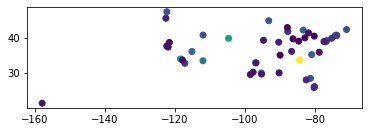

In [44]:
gdf_air

<AxesSubplot:>

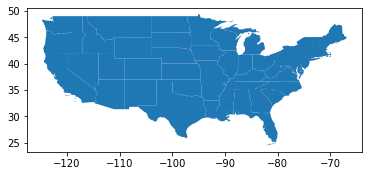

In [72]:
states.plot()

In [88]:
gdf_air[['ORIGIN', 'size']]

,ORIGIN,size
0,ATL,3824.282
1,ORD,2906.311
2,DFW,2482.216
3,DEN,2271.252
4,LAX,2106.076
5,PHX,1705.334
6,IAH,1640.679
7,SFO,1580.093
8,LAS,1458.937
9,CLT,1300.957


In [123]:
!pip install geoplot

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\bruce\anaconda3\python.exe' 'C:\Users\bruce\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\bruce\AppData\Local\Temp\tmp33indzrf'
       cwd: C:\Users\bruce\AppData\Local\Temp\pip-install-if0l3vqn\cartopy_cdb80c46fa864257b295df5bff6bb47e
  Complete output (3 lines):
  setup.py:120: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
  Proj version 5.2.0 is installed, but cartopy requires at least version 8.0.0.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\bruce\anaconda3\python.exe' 'C:\Users\bruce\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\bruce\AppData\Local\Temp\tmpnxdf_umu'
       cwd: C:\Users\bruce\AppData\Local\Temp\pi

  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel


  Complete output (3 lines):
  setup.py:120: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
  Proj version 5.2.0 is installed, but cartopy requires at least version 8.0.0.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\bruce\anaconda3\python.exe' 'C:\Users\bruce\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\bruce\AppData\Local\Temp\tmppd4gbzi9'
       cwd: C:\Users\bruce\AppData\Local\Temp\pip-install-if0l3vqn\cartopy_6370114ca1f143e1a821a8c738e13a3f
  Complete output (3 lines):
  setup.py:120: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
  Proj version 5.2.0 is installed, but cartopy requires at least version 8.0.0.
  ---------

  Running setup.py clean for rasterio
Failed to build cartopy rasterio


  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-3.7\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-3.7\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-3.7\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-3.7\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-3.7\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-3.7\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-3.7\cartopy
  creating build\lib.win-amd64-3.7\cartopy\feature
  copying lib\cartopy\feature\nightshade.py -> build\lib.win-amd64-3.7\cartopy\feature
  copying lib\cartopy\feature\__init__.py -> build\lib.win-amd64-3.7\cartopy\feature
  creating build\lib.win-amd64-3.7\cartopy\geodesic
  copying lib\cartopy\geodesic\__init__.py -> build\lib.win-amd64-3.7\cartopy\geodesic
  creating build\lib.win-amd64-3.7\cartopy\io
  copying lib

In [14]:
# Manually set markersize for visibility
gdf_air['marksize'] = np.where(gdf_air['count'] > 1500000, gdf_air['count']/1000, 100)

In [22]:
big_airport = gdf_air.loc[gdf_air['marksize']>100]['ORIGIN']
big_airport

0    ATL
1    ORD
2    DFW
3    DEN
4    LAX
5    PHX
6    IAH
7    SFO
Name: ORIGIN, dtype: object

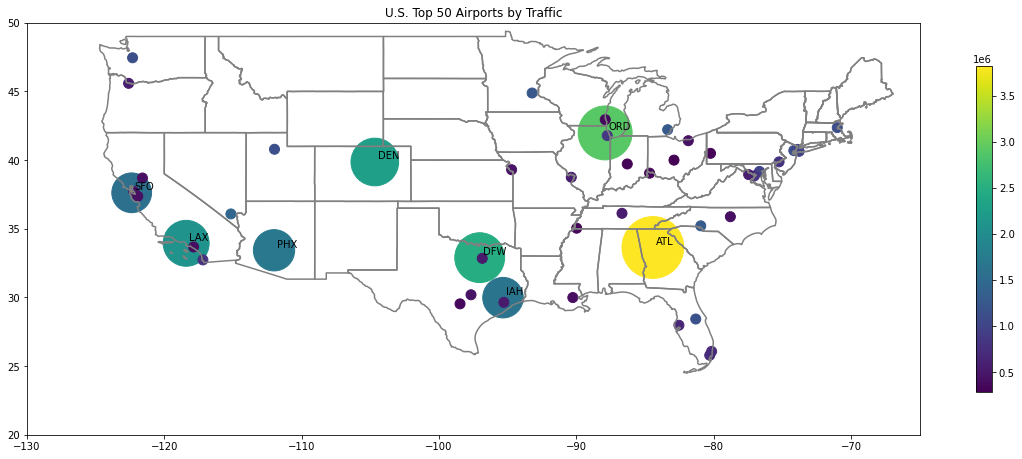

In [24]:
%matplotlib inline

fig, ax = plt.subplots(figsize = (20,20))
states.boundary.plot(ax = ax, color = 'gray', figsize=(50,50))
gdf_air.plot(ax = ax, column = 'count', markersize = 'marksize', legend = True, legend_kwds={'shrink': 0.3})

for x, y, label,size in zip(gdf_air.geometry.x, gdf_air.geometry.y, gdf_air.ORIGIN, gdf_air.marksize):
    if size > 100:
        ax.annotate(label, xy=(x, y), xytext=(3, 3),textcoords="offset points") 

plt.axis([-130, -65, 20, 50])
plt.title('U.S. Top 50 Airports by Traffic')
plt.show()